## MIMIC III

Background

MIMIC stands for Medical Information Mart for Intensive Care

Dataset was created by a bunch of researchers at MIT who collected data from the Beth Israel Deaconess Medical Center at Boston between the years of 2001-2012 and this dataset contains 46,520 unique patients.

This dataset uses the [**The PhysioNet Credentialed Health Data License**](https://physionet.org/content/mimiciii/view-license/1.4/)


### Previous Analysis
Some Biomedical Engineering students in Barcelona built a [Deep Learning Mortality Prediction Model](https://github.com/DanielSola/mimic-iii-project)

Harvard Researches built [Medical Chatbots with Large Language Models](https://read.qxmd.com/read/39331556/enhancing-clinical-accuracy-of-medical-chatbots-with-large-language-models) 4 days ago


### [Data Model](https://mit-lcp.github.io/mimic-schema-spy/relationships.html)

All of the D_ tables are dictionaries that explain codes used in other tables.

### [Query Builder](https://querybuilder-lcp.mit.edu/dashboard#)

### Citation:
Johnson, A., Pollard, T., & Mark, R. (2016). MIMIC-III Clinical Database (version 1.4). PhysioNet. https://doi.org/10.13026/C2XW26.

First we can take a look at who the patients are.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import gzip

In [2]:
with gzip.open('./mimic-iii-clinical-database-1.4/PATIENTS.csv.gz') as file:
    patients = pd.read_csv(file)

In [3]:
patients.shape

(46520, 8)

In [4]:
patients.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0


Patients ages have been date shifted to obscure the ages and dates of birth in order to comply with HIPAA regulation so we need admission time to find their real age

In [5]:
with gzip.open('./mimic-iii-clinical-database-1.4/ADMISSIONS.csv.gz') as file:
    admissions = pd.read_csv(file)

In [6]:
admissions.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,NaN,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,NaN,CATHOLIC,MARRIED,WHITE,NaN,NaN,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,NaN,NaN,BRAIN MASS,0,1
3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,NaN,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,Private,NaN,PROTESTANT QUAKER,SINGLE,WHITE,NaN,NaN,INTERIOR MYOCARDIAL INFARCTION,0,1
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


We can now merge the admissions table which contains the admittime and the date of birth from the patients table to calculate their real age

In [7]:
merged = pd.merge(admissions, patients, on='SUBJECT_ID')
merged = merged[['ADMITTIME', 'DOB']].head()
merged['AGE'] = np.floor((pd.to_datetime(merged['ADMITTIME']) - pd.to_datetime(merged['DOB'])).dt.days / 365.25).astype(int)
merged.head()

,ADMITTIME,DOB,AGE
0,2196-04-09 12:26:00,2131-05-07 00:00:00,64
1,2153-09-03 07:15:00,2082-07-17 00:00:00,71
2,2157-10-18 19:34:00,2082-07-17 00:00:00,75
3,2139-06-06 16:14:00,2100-05-31 00:00:00,39
4,2160-11-02 02:06:00,2101-11-21 00:00:00,58


In [8]:
patients['AGE'] = merged['AGE']
patients.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,AGE
0,234,249,F,2075-03-13 00:00:00,NaN,NaN,NaN,0,64.0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,NaN,1,71.0
2,236,251,M,2090-03-15 00:00:00,NaN,NaN,NaN,0,75.0
3,237,252,M,2078-03-06 00:00:00,NaN,NaN,NaN,0,39.0
4,238,253,F,2089-11-26 00:00:00,NaN,NaN,NaN,0,58.0


<Axes: ylabel='AGE'>

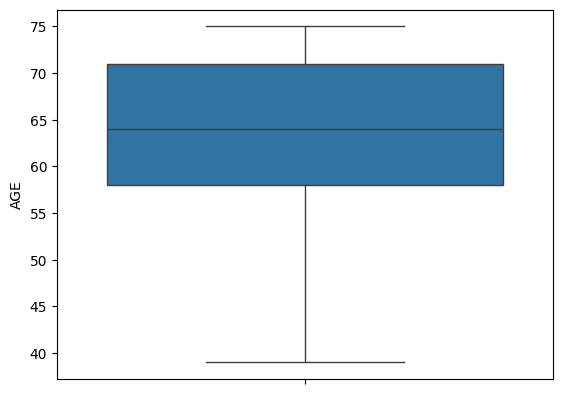

In [9]:
sns.boxplot(patients['AGE'])

Above is the distribution of age in this dataset and it is skewed towards patients that are older than 40 which can be problematic for models trained on this data, we wouldn't want to use this for pediatrics for example.

Lets trace through a patients life at the hospital based on the data alone (Subject 25)

In [10]:
mask = admissions['SUBJECT_ID'].isin([25])
filtered_admissions = admissions[mask]
filtered_admissions.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,NaN,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,Private,NaN,UNOBTAINABLE,MARRIED,WHITE,2160-11-02 01:01:00,2160-11-02 04:27:00,ACUTE CORONARY SYNDROME,0,1


We can use the HADM_ID to dive deeper as that column is used for Hospital Level Data.
Subject ID was used for patient level data.

In [11]:
with gzip.open('./mimic-iii-clinical-database-1.4/NOTEEVENTS.csv.gz') as file:
    chunks = pd.read_csv(file, chunksize=90000, on_bad_lines='skip', low_memory=False)
    notes = pd.concat(chunks)
    
notes['CHARTDATE'] = pd.to_datetime(notes['CHARTDATE'], errors='coerce')
notes['CHARTTIME'] = pd.to_datetime(notes['CHARTTIME'], errors='coerce')


In [12]:
mask = notes['HADM_ID'].isin([129635])
filtered_notes = notes[mask]
filtered_notes.reset_index(drop=True)
sorted_notes = filtered_notes.sort_values(by=['CHARTDATE', 'CHARTTIME'], ascending=True).reset_index(drop=True)
sorted_notes.head(20)

,ROW_ID,SUBJECT_ID,HADM_ID,CHARTDATE,CHARTTIME,STORETIME,CATEGORY,DESCRIPTION,CGID,ISERROR,TEXT
0,1260825,25,129635.0,2160-11-02,2160-11-02 07:51:00,2160-11-02 08:33:00,Nursing/other,Report,16870.0,NaN,NURSING PROGRESS NOTE\n58 Y/O MALE ADMITTED FR...
1,1260826,25,129635.0,2160-11-02,2160-11-02 17:24:00,2160-11-02 18:40:00,Nursing/other,Report,20818.0,NaN,CCU Progress Note:\n\nThis is a 58 yr old male...
2,1260827,25,129635.0,2160-11-02,2160-11-02 19:07:00,2160-11-02 19:10:00,Nursing/other,Report,20818.0,NaN,ADDENDUM: Post cath Pt vomitted approx 50cc br...
3,78499,25,129635.0,2160-11-02,NaT,NaN,Echo,Report,NaN,NaN,PATIENT/TEST INFORMATION:\nIndication: Left ve...
4,181638,25,129635.0,2160-11-02,NaT,NaN,ECG,Report,NaN,NaN,Sinus rhythm. Borderline P-R interval prolonga...
5,181639,25,129635.0,2160-11-02,NaT,NaN,ECG,Report,NaN,NaN,Sinus tachycardia\nBorderline first degree A-V...
6,181640,25,129635.0,2160-11-02,NaT,NaN,ECG,Report,NaN,NaN,Sinus rhythm\nAnterolateral infarct - age unde...
7,181641,25,129635.0,2160-11-02,NaT,NaN,ECG,Report,NaN,NaN,Sinus rhythm\nrSr'(V1) - probable normal varia...
8,1260828,25,129635.0,2160-11-03,2160-11-03 05:42:00,2160-11-03 06:05:00,Nursing/other,Report,20220.0,NaN,NEURO: Alert and oriented x3 c/o pain in right...
9,1260829,25,129635.0,2160-11-03,2160-11-03 07:11:00,2160-11-03 07:14:00,Nursing/other,Report,20220.0,NaN,addendum/correction= nasal prongs at 4l. Insul...


There are a bunch of progress updates and tests that were done so if we had the time we could also look at what tests were ordered and the exact results too with the microbiology table

In [13]:
print(sorted_notes.loc[0, 'TEXT'])

NURSING PROGRESS NOTE
58 Y/O MALE ADMITTED FROM [**Hospital1 2**] ER (TRANSFERED FROM [**Hospital6 136**]).  HE INITIALLY PRESENTED TO [**Hospital6 136**] WITH C/O N/V, DIZZINESS.  HE IS S/P INSULIN PUMP INSERTION IN [**2160-5-13**].  HIS PUMP FAILED ON SATURDAY AND BEGAN FEELING POORLY.  HE WAS ADMITTED WITH A BLOOD GLUCOSE > 575.  HE ALSO HAD ST CHANGES ON EKG.  HE WAS TREATED WITH IV LOPRESSOR, INTEGRILLIN, IV NS, INSULIN.  HE REFUSED ASA STATING IT MAKES HIS STOMACH UPSET.  ADMITTED TO CCU FOR R/O MI PROTOCOL.

NEURO:  PT. ARRRIVED IN CCU LETHARGIC BUT AROUSABLE.  MOVING ALL EXTREMITIES.  PT. ORIENTED X3.  CONVERSANT AND PLEASANT.  C/O DISCOMFORT IN RIGHT SHOULDER.  (PT. S/P FALL ON ICE LAST TUESDAY, X-RAY DONE NO FRACTURES).  HAS NOT TAKEN ANY PAIN MEDICINE SINCE FALL.  UNABLE TO LIFT ARM HIGHER THAN HEART.

CV:  DENIES CP WHEN QUESTIONED.  HEART RATE 80'S SA NO VEA NOTED.  BP 100-110 SYS.  K+ 3.3, GIVEN 40 MEQ KCL PO.  INTEGRILIN AT 2 MCG/KG/MIN.  WHILE ATTEMPTING TO PLACE ALINE 

ChatGPT was much better at understanding all the terminology

"The patient is a 58-year-old male admitted for an evolving myocardial infarction (MI) and diabetic ketoacidosis (DKA) after an insulin pump failure. He presents lethargic but arousable, with elevated blood glucose levels (200-300s), hypotension (BP 100-110 systolic), and bradycardia (HR 45-47). EKG shows ST elevation, and he is being treated with IV fluids, insulin, and potassium. He denies chest pain, has a dry mouth, and is NPO. A catheterization lab evaluation is planned, with close monitoring of blood sugars and electrolytes"


Also its important to note that if this were to be used for an NLP model to process this unstructured text data, the data needs to be cleaned of the details such as  [**Hospital1 2**] 

We can see exactly how long the patient stayed in the ICU for with the ICU_STAYS table.

In [14]:
with gzip.open('./mimic-iii-clinical-database-1.4/ICUSTAYS.csv.gz') as file:
    icu_stays = pd.read_csv(file)


In [15]:
mask = icu_stays['HADM_ID'].isin([129635])
filtered_icu = icu_stays[mask]
filtered_icu.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
390,26,25,129635,203487,carevue,CCU,CCU,7,7,2160-11-02 03:16:23,2160-11-05 16:23:27,3.5466


Skipping a whole bunch of steps we can look at the discharge summary from the note events table

In [16]:
print(sorted_notes.loc[18, 'TEXT'])

Admission Date:  [**2160-11-2**]              Discharge Date:   [**2160-11-5**]

Date of Birth:  [**2101-11-21**]             Sex:   M

Service: MEDICINE

Allergies:
Motrin

Attending:[**First Name3 (LF) 106**]
Chief Complaint:
transferred from OSH for DKA, r/o MI

Major Surgical or Invasive Procedure:
s/p cardiac catheterization with stenting of left circumflex
artery


History of Present Illness:
58 yo male with hx type 1 DM on insulin pump, ?vertigo, no known
[**Hospital **] transferred to CCU for management of presumed DKA in the
setting of new EKG changes and borderline enzymes. No previous
CAD history althouth cath in '[**41**] reported to be negative with
subsequent negative stress test. Pt has history of vertigo with
recent flare after fall from slipping on ice. Otherwise, pt was
in USOH until 1 day prior to admission when his insulin pump
fell out at 2am. Pt took some short acting insulin, but no
lantus. Pt developed worsening nausea followed by several
episodes of emesis. Den